In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm

In [98]:
datadir = "/content/drive/MyDrive/VNmoney/train"

In [99]:
categories=['1000','10000','100000','2000','20000','200000','500','5000','50000','500000']

In [100]:
img_size=128

[[250 253 255 ... 245 247 253]
 [250 252 254 ... 248 249 255]
 [250 250 251 ... 248 247 253]
 ...
 [249 234 242 ... 243 223 251]
 [246 204 182 ... 187 194 255]
 [254 241 243 ... 234 243 246]]


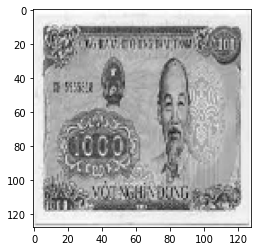

In [101]:
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [102]:
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 11/11 [00:00<00:00, 219.47it/s]

110


In [103]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)

In [104]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/VNmoney/Save/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()
pickle_out=open("/content/drive/MyDrive/VNmoney/Save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [105]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [106]:
pickle_in = open("/content/drive/MyDrive/VNmoney/Save/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/VNmoney/Save/y.pickle","rb")
y= pickle.load(pickle_in)

In [107]:
X=X/255.0

In [108]:
y= to_categorical(y,10)

In [109]:
y.shape

(110, 10)

In [110]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(128,128,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

In [111]:
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 conv2d_25 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                 

In [112]:
from tensorflow.keras.optimizers import SGD
opt =SGD()

In [113]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [114]:
history=model.fit(X,y,epochs=100,batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 247ms/step - loss: 7.0335 - accuracy: 0.0795 - val_loss: 12.6189 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 76ms/step - loss: 8.5287 - accuracy: 0.0682 - val_loss: 3.7079 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 63ms/step - loss: 2.8434 - accuracy: 0.1250 - val_loss: 2.3294 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 64ms/step - loss: 2.3321 - accuracy: 0.1250 - val_loss: 2.3605 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 61ms/step - loss: 2.2938 - accuracy: 0.1250 - val_loss: 2.4128 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 60ms/step - loss: 2.2764 - accuracy: 0.1477 - val_loss: 2.5554 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 62ms/step - loss: 2.2604 - accuracy: 0.1250 - val_loss: 2.6082 - val_accuracy: 0

In [115]:
model.save('VNMoney.h5')

In [116]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

In [117]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(128, 128))	
	
	return img
labels = {0: '1000',1: '10000',2: '100000',3:'2000',4:'20000',5:'200000',6:'500',7:'5000',8:'50000',9:'500000'}

In [118]:
model = load_model('VNMoney.h5')

[[1.7821226e-14 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
expectation 500


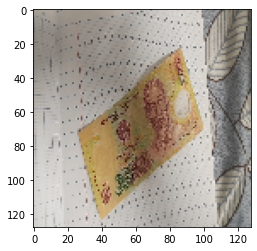

In [119]:
img = load_image('/content/drive/MyDrive/VNmoney/test/10000(test).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 3.5921537e-29 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
expectation 10000


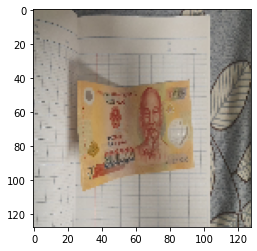

In [120]:
img = load_image('/content/drive/MyDrive/VNmoney/test/200000(test).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
expectation 500


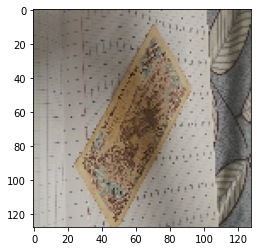

In [121]:
img = load_image('/content/drive/MyDrive/VNmoney/test/2000(test).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation 10000


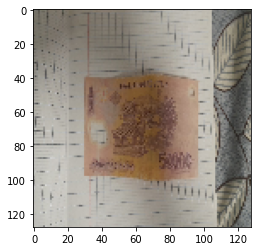

In [122]:
img = load_image('/content/drive/MyDrive/VNmoney/test/50000(test).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[2.6342497e-16 9.9994802e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 5.1913728e-05 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
expectation 10000


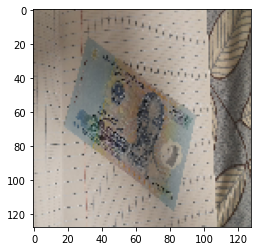

In [123]:
img = load_image('/content/drive/MyDrive/VNmoney/test/20000(test).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,128,128,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])